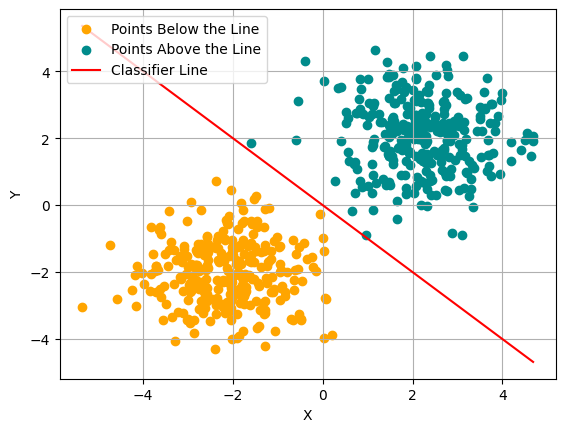

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

k = -1
m = 0

def classify(row,k,m):
    
    pointx = row["X"]
    pointy = row["Y"]
    line_y = k*pointx +m
    if line_y >= pointy: 
        return 0
    else: 
        return 1
    
def plot(df):
    x_min = (df["X"].min())
    x_max = (df["X"].max())

    y_start = k*x_min+m
    y_end = k*x_max+m

    df0 = df[df["Label"]==0]
    df1 = df[df["Label"]==1]

    plt.scatter(df0["X"],df0["Y"],c = "Orange", label = "Points Below the Line")
    plt.scatter(df1["X"],df1["Y"], c = "DarkCyan", label = "Points Above the Line")
    plt.plot([x_min,x_max],[y_start,y_end], c = "red", label="Classifier Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()

    plt.show()

def main():
    try:
        df = pd.read_csv("unlabelled_data.csv", header = None)
    except FileNotFoundError:
        print("The file 'unlabelled_data.csv' could not be found in the script folder.")

    df = df.dropna()
    df.rename(columns={0:"X",1:"Y"}, inplace=True)
    

    df["Label"] = df.apply(classify, axis=1, args=(k,m))
    plot(df)
    df.to_csv("labelled_data.csv", index=False)


if __name__ == "__main__":
    main()
